In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



Hyperparameters

In [ ]:
###----------------
#Global Variables
###----------------

from calendar import EPOCH


TEST_SIZE = 0.2
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)


N_SAMPLES = 1000
NOISE = 0.1
ALPHA = 0.1
EPOCHS = 200

# set location of input files and output files
inpDir = '../input'
outDir = '../output'


# Set plotting parameters
params = {
    'figure.figsize': (15,4),
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
}
plt.rcParams.update(params)


CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

Load Data

In [15]:
X, y = datasets.make_moons(
    n_samples=N_SAMPLES,
    noise=NOISE, 
    random_state=RANDOM_STATE, 
    shuffle=True
)

X.shape, y.shape


((1000, 2), (1000,))

EDA

In [24]:
df = pd.DataFrame(X, columns=["X_1", "X_2"])
df["Target"] = y
df.head()

,X_1,X_2,Target
0,0.792541,0.818526,0
1,-0.863416,0.773533,0
2,1.940985,0.405386,1
3,-0.961492,0.060649,0
4,-0.983730,0.057154,0


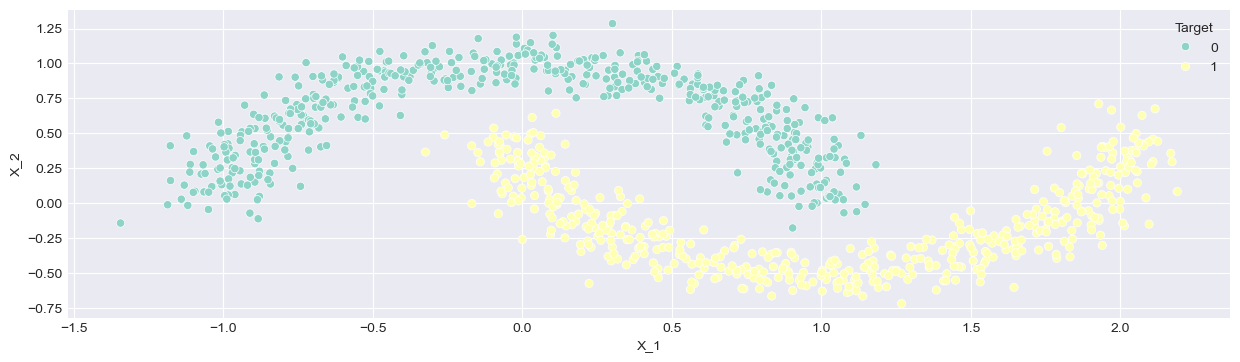

In [ ]:
plt.figure()
sns.scatterplot(x="X_1", y="X_2", hue="Target", data=df)
plt.show()
 

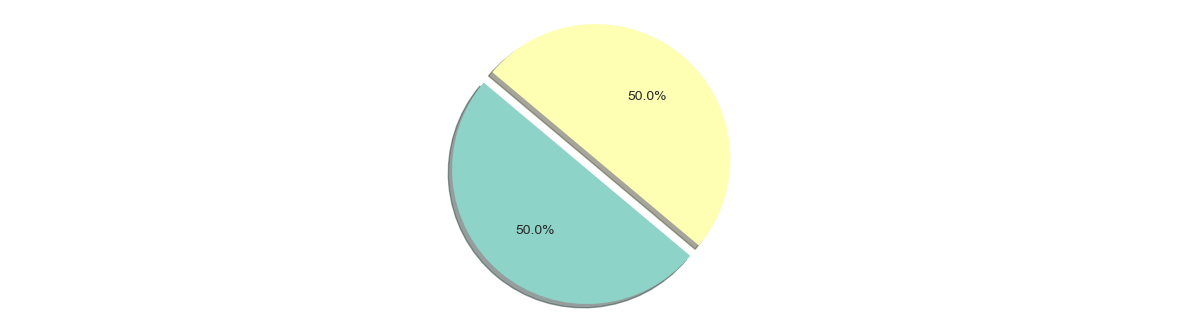

In [36]:
fix, axis = plt.subplots()
explode = (0, 0.1,) # only "explode" the 2nd ring
axis.pie(
    df['Target'].value_counts(), 
    explode=explode, 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=140
)
axis.axis('equal') 
plt.show()

In [34]:
data_train, data_text = df.to_numpy()[:9000], df.to_numpy()[9000:]

display(data_train.shape, data_text.shape)
display(type(data_train), type(data_text))

(1000, 3)

(0, 3)

numpy.ndarray

numpy.ndarray

In [ ]:
def predict(row, wgts):
    """
    Make a prediction based on the given row and weights.

    Args:
        row (array): all the values in the row
        wgts (_type_): all the weights for perticular epoch 

    Returns:
        z (int): the prediction
    """

    z = wgts[0] # bias

    for i in range(len(row) - 1):
        z = z + row[i] * wgts[i + 1]

    return 1 if z >= 0 else 0


predict(
    df.loc[0].values,
    np.array([0.5, 0.3, 0.2])
)

1

In [ ]:
# This will generate a random number
rng = np.random.default_rng(seed=RANDOM_STATE)


def train_weights(train, aplha, n_epochs):
    """
    This is the training function for the neural network. without using any activation function
    ∂Loss(a,y)/∂z = a - y   => ∂z = dz 
    ∂Loss(a,y)/∂w = a - y   => ∂w = dw

    Args:
        train (array): all the feature variables
        aplha (float): the learning rate    
        n_epochs (int): the number of epochs / iterations
    
    Returns:
        weights (array): the weights of the neural network
    """

    errors = []
    weights = rng.random(train.shape[1]) # Random initial weights
    m = train.shape[0] # Number of samples

    for epoch in range(n_epochs):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            dz = prediction- row[-1]








